In [115]:
import pandas as pd 
import os

In [116]:
files = os.listdir('data/')
print(files)

['Kona Weather Data - All Years.csv', 'mega_data', 'mega_data_pro', 'mega_data_pro2.csv', 'Runningman2008', 'Runningman2009', 'Runningman2010', 'Runningman2011', 'Runningman2012', 'Runningman2013', 'Runningman2014', 'Runningman2015', 'Runningman2016', 'Runningman2017', 'Runningman2018', 'weather_final']


In [117]:
mega_data = pd.read_csv('data/mega_data_pro2.csv')

In [118]:
type(mega_data.Humidity.unique()[0])

numpy.float64

In [119]:
mega_data.South.unique()

array([3.107, 3.21 , 7.853, 8.158, 6.521, 8.111, 5.264, 7.391, 8.429,
       5.068, 0.   ])

In [120]:
mega_data.head()

,Unnamed: 0,swim,bike,run,finish,Gender,Year,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,Continent
0,0,51.717,277.317,165.000,497.750,2,2008,80.647,84,56.647,8.118,7.5,3.107,0,Au
1,1,69.367,322.683,212.333,609.633,1,2008,80.647,84,56.647,8.118,7.5,3.107,0,NoA
2,2,51.717,273.400,190.017,519.533,2,2008,80.647,84,56.647,8.118,7.5,3.107,0,Eu
3,3,51.750,296.883,176.017,528.967,2,2008,80.647,84,56.647,8.118,7.5,3.107,0,Eu
4,4,59.050,294.450,193.567,552.350,2,2008,80.647,84,56.647,8.118,7.5,3.107,0,Eu


In [121]:
features = mega_data[['Gender', "Avg Temp", 'Hi Temp', "Humidity", 'Wind Speed', 'West', 'South', 'Year', 'Continent', 'extreme_heat']]

In [122]:
target_swim = mega_data.swim
target_bike = mega_data.bike
target_run = mega_data.run
target_finish = mega_data.finish

In [123]:
features.head()

,Gender,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,Year,Continent,extreme_heat
0,2,80.647,84,56.647,8.118,7.5,3.107,2008,Au,0
1,1,80.647,84,56.647,8.118,7.5,3.107,2008,NoA,0
2,2,80.647,84,56.647,8.118,7.5,3.107,2008,Eu,0
3,2,80.647,84,56.647,8.118,7.5,3.107,2008,Eu,0
4,2,80.647,84,56.647,8.118,7.5,3.107,2008,Eu,0


In [124]:
features['male'] = pd.get_dummies(features['Gender'], drop_first=True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
features.drop('Gender', axis=1, inplace=True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [126]:
features.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,Year,Continent,extreme_heat,male
0,80.647,84,56.647,8.118,7.5,3.107,2008,Au,0,1
1,80.647,84,56.647,8.118,7.5,3.107,2008,NoA,0,0
2,80.647,84,56.647,8.118,7.5,3.107,2008,Eu,0,1
3,80.647,84,56.647,8.118,7.5,3.107,2008,Eu,0,1
4,80.647,84,56.647,8.118,7.5,3.107,2008,Eu,0,1


In [127]:
features2 = mega_data[['Gender', "Avg Temp", 'Hi Temp', "Humidity", 'Wind Speed', 'West', 'South', 'Year', 'Continent', 'extreme_heat']]

In [128]:
continent_df = pd.get_dummies(mega_data['Continent'])

In [129]:
features = features.merge(continent_df, how = 'left', left_index = True, right_index = True)

In [130]:
features.shape

(870, 16)

In [131]:
features.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,Year,Continent,extreme_heat,male,A,Af,Au,Eu,NoA,SA
0,80.647,84,56.647,8.118,7.5,3.107,2008,Au,0,1,0,0,1,0,0,0
1,80.647,84,56.647,8.118,7.5,3.107,2008,NoA,0,0,0,0,0,0,1,0
2,80.647,84,56.647,8.118,7.5,3.107,2008,Eu,0,1,0,0,0,1,0,0
3,80.647,84,56.647,8.118,7.5,3.107,2008,Eu,0,1,0,0,0,1,0,0
4,80.647,84,56.647,8.118,7.5,3.107,2008,Eu,0,1,0,0,0,1,0,0


In [132]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [133]:
import seaborn as sns

(array([  9.,  32.,  86., 100., 101.,  78.,  92.,  95.,  81.,  59.,  44.,
         37.,  18.,  14.,   7.,   1.,   7.,   2.,   3.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([472.65      , 485.09478125, 497.5395625 , 509.98434375,
        522.429125  , 534.87390625, 547.3186875 , 559.76346875,
        572.20825   , 584.65303125, 597.0978125 , 609.54259375,
        621.987375  , 634.43215625, 646.8769375 , 659.32171875,
        671.7665    , 684.21128125, 696.6560625 , 709.10084375,
        721.545625  , 733.99040625, 746.4351875 , 758.87996875,
        771.32475   , 783.76953125, 796.2143125 , 808.65909375,
        821.103875  , 833.54865625, 845.9934375 , 858.43821875,
        870.883     ]),
 <a list of 32 Patch objects>)

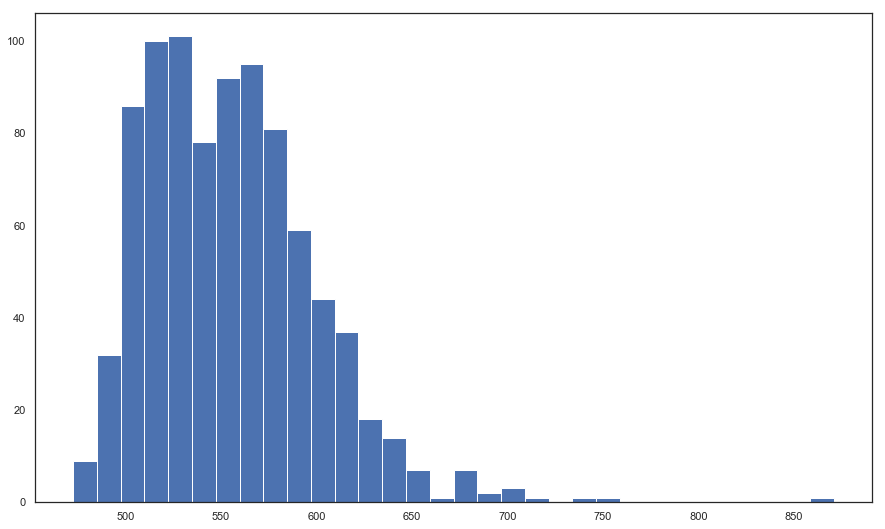

In [134]:
plt.figure(figsize = (15,9))
plt.hist(target_finish, bins = 'auto')

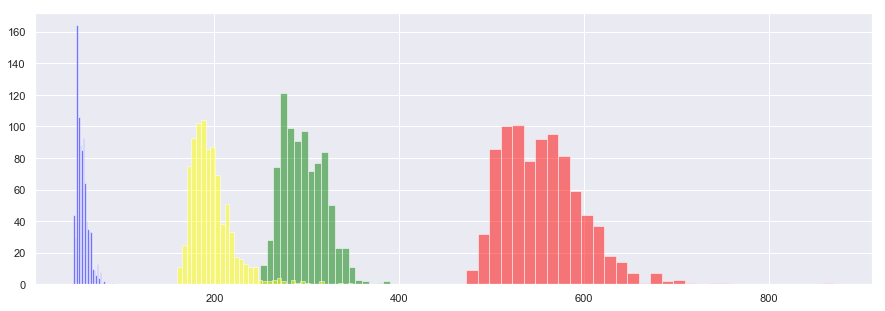

In [135]:
sns.set_style('darkgrid')
plt.figure(figsize= (15,5))
plt.hist(target_swim, bins='auto', alpha = .5, color = 'blue')
plt.hist(target_bike, bins='auto', alpha = .5, color = 'green')
plt.hist(target_run, bins='auto', alpha = .5, color = 'yellow')
plt.hist(target_finish, bins='auto', alpha = .5, color = 'red')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c206244a8>]],
      dtype=object)

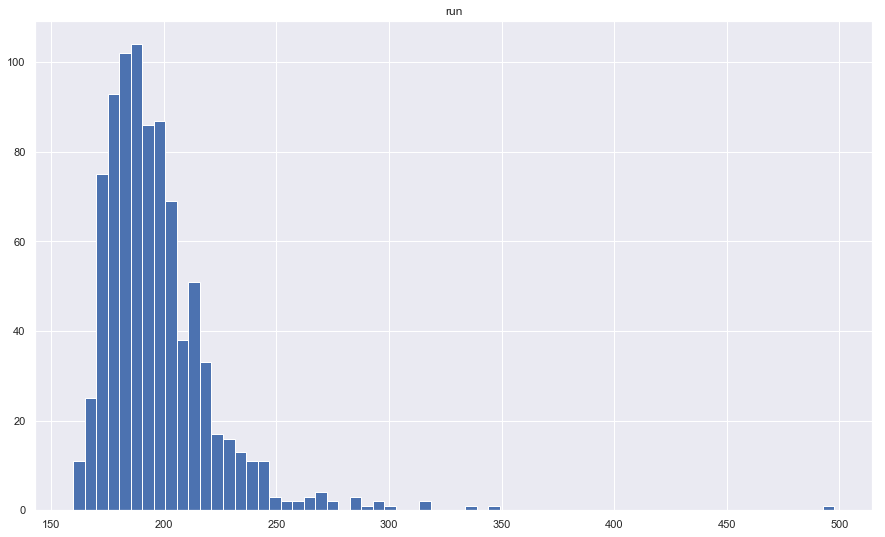

In [136]:
pd.DataFrame(target_run).hist(bins='auto', figsize= (15,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c216f4390>]],
      dtype=object)

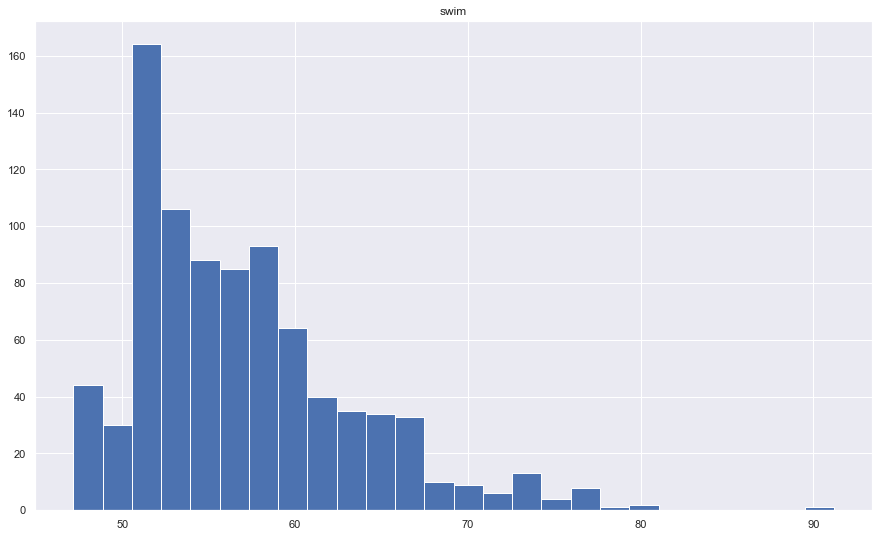

In [137]:
pd.DataFrame(target_swim).hist(bins='auto', figsize= (15,9))

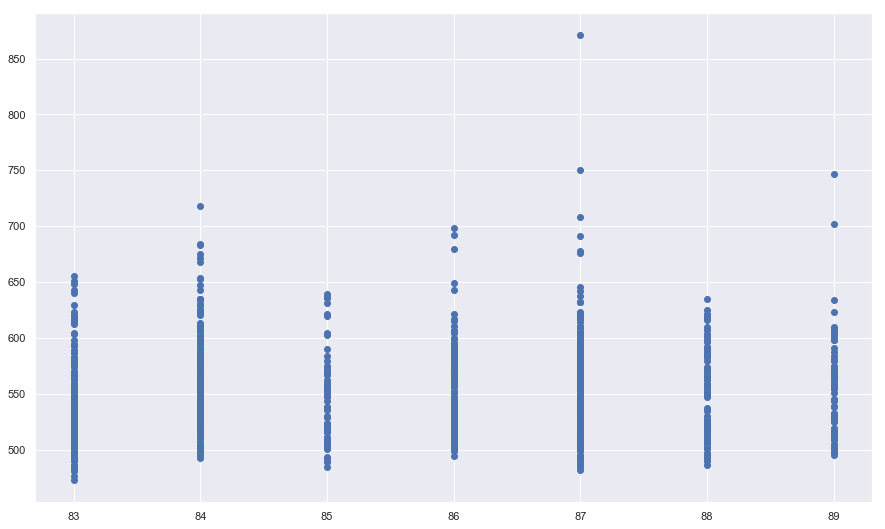

In [138]:
plt.figure(figsize = (15,9))

plt.scatter(features['Hi Temp'], target_finish)

In [139]:
features.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,Year,Continent,extreme_heat,male,A,Af,Au,Eu,NoA,SA
0,80.647,84,56.647,8.118,7.5,3.107,2008,Au,0,1,0,0,1,0,0,0
1,80.647,84,56.647,8.118,7.5,3.107,2008,NoA,0,0,0,0,0,0,1,0
2,80.647,84,56.647,8.118,7.5,3.107,2008,Eu,0,1,0,0,0,1,0,0
3,80.647,84,56.647,8.118,7.5,3.107,2008,Eu,0,1,0,0,0,1,0,0
4,80.647,84,56.647,8.118,7.5,3.107,2008,Eu,0,1,0,0,0,1,0,0


In [140]:
features = features.drop(['Continent'], axis=1)

In [141]:
year_df = pd.get_dummies(features['Year'])

In [142]:
year_df.columns = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']

In [143]:
year_df.columns

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

In [144]:
features = features.merge(year_df, how = 'left', left_index = True, right_index = True)

In [145]:
features = features.drop(['Year'], axis = 1)

In [146]:
features.columns

Index(['Avg Temp', 'Hi Temp', 'Humidity', 'Wind Speed', 'West', 'South',
       'extreme_heat', 'male', 'A', 'Af', 'Au', 'Eu', 'NoA', 'SA', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'],
      dtype='object')

In [147]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [148]:
X_train, X_test, y_train, y_test = train_test_split(features, target_finish, random_state=32,test_size=0.2)


In [149]:
from sklearn import preprocessing
from sklearn import pipeline

scaler = preprocessing.StandardScaler()

In [150]:
features.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,male,A,Af,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,80.647,84,56.647,8.118,7.5,3.107,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.647,84,56.647,8.118,7.5,3.107,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,80.647,84,56.647,8.118,7.5,3.107,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80.647,84,56.647,8.118,7.5,3.107,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80.647,84,56.647,8.118,7.5,3.107,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
X_train.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,male,A,Af,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
788,81.333,85,63.444,7.167,5.068,5.068,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
381,82.222,86,57.667,9.222,6.521,6.521,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
673,83.238,88,65.429,8.429,0.000,8.429,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
121,83.556,87,63.000,8.389,7.750,3.210,2,1,0,0,...,1,0,0,0,0,0,0,0,0,0
704,83.238,88,65.429,8.429,0.000,8.429,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [152]:
scaler.fit(X_train.iloc[:,:6])
features_scaled_train = pd.DataFrame(scaler.transform(X_train.iloc[:,:6]), columns=X_train.columns[:6], index=X_train.index)

# features_scaled_train['female']= X_train.female

# features_scaled_train.head()

In [153]:
features_scaled_train.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South
788,-0.096154,-0.298148,-0.317674,-1.065374,0.244074,-0.172337
381,0.276164,0.220629,-1.282797,1.655031,0.745229,0.401768
673,0.701671,1.258183,0.013946,0.605259,-1.503934,1.155650
121,0.834851,0.739406,-0.391850,0.552307,1.169125,-0.906463
704,0.701671,1.258183,0.013946,0.605259,-1.503934,1.155650


In [154]:
features_scaled_train2 = features_scaled_train.merge(X_train.iloc[:, 6:], left_index = True, right_index = True)

In [155]:
features_scaled_train2.columns

Index(['Avg Temp', 'Hi Temp', 'Humidity', 'Wind Speed', 'West', 'South',
       'extreme_heat', 'male', 'A', 'Af', 'Au', 'Eu', 'NoA', 'SA', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'],
      dtype='object')

In [156]:
X_test.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,male,A,Af,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
630,82.611,87,68.222,8.000,3.061,7.391,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
804,79.913,83,79.000,5.957,5.957,0.000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
530,76.167,83,68.944,7.444,5.264,5.264,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
438,85.167,89,65.444,8.111,0.000,8.111,4,1,0,0,...,0,0,0,0,0,0,1,0,0,0
36,80.647,84,56.647,8.118,7.500,3.107,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
features_scaled_test = pd.DataFrame(scaler.transform(X_test.iloc[:,:6]), columns=X_test.columns[:6], index=X_test.index)

In [158]:
features_scaled_test2 = features_scaled_test.merge(X_test.iloc[:, 6:], left_index = True, right_index = True)

In [159]:
features_scaled_test2.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,male,A,Af,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
630,0.439079,0.739406,0.480553,0.037350,-0.448162,0.745519,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
804,-0.690859,-1.335702,2.281157,-2.667170,0.550700,-2.174788,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
530,-2.259705,-1.335702,0.601172,-0.698682,0.311676,-0.094894,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
438,1.509547,1.776960,0.016452,0.184291,-1.503934,1.030003,4,1,0,0,...,0,0,0,0,0,0,1,0,0,0
36,-0.383455,-0.816925,-1.453201,0.193558,1.082897,-0.947160,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


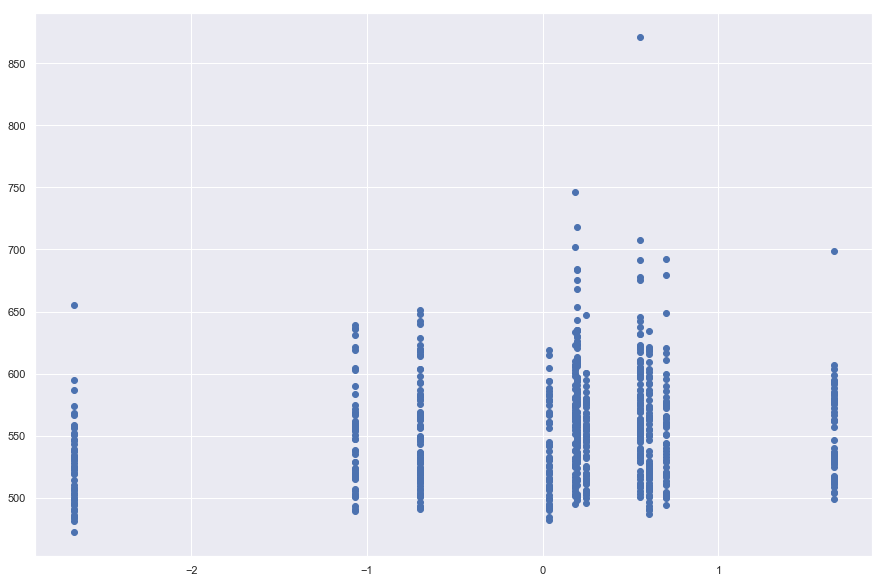

In [160]:
plt.figure(figsize = (15,10))
plt.scatter(features_scaled_train2['Wind Speed'], y_train)

# Feature Engineering

In [161]:
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [162]:
features_scaled_train2.columns

Index(['Avg Temp', 'Hi Temp', 'Humidity', 'Wind Speed', 'West', 'South',
       'extreme_heat', 'male', 'A', 'Af', 'Au', 'Eu', 'NoA', 'SA', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'],
      dtype='object')

In [163]:
features_to_train = pd.DataFrame(poly.fit_transform(features_scaled_train2), columns=poly.get_feature_names(features_scaled_train2.columns))
features_to_train.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,male,A,Af,...,2015^2,2015 2016,2015 2017,2015 2018,2016^2,2016 2017,2016 2018,2017^2,2017 2018,2018^2
0,-0.096154,-0.298148,-0.317674,-1.065374,0.244074,-0.172337,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.276164,0.220629,-1.282797,1.655031,0.745229,0.401768,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.701671,1.258183,0.013946,0.605259,-1.503934,1.155650,3.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.834851,0.739406,-0.391850,0.552307,1.169125,-0.906463,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.701671,1.258183,0.013946,0.605259,-1.503934,1.155650,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [164]:
features_many_test = pd.DataFrame(poly.fit_transform(features_scaled_test2), columns=poly.get_feature_names(features_scaled_test2.columns))
features_many_test.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,male,A,Af,...,2015^2,2015 2016,2015 2017,2015 2018,2016^2,2016 2017,2016 2018,2017^2,2017 2018,2018^2
0,0.439079,0.739406,0.480553,0.037350,-0.448162,0.745519,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.690859,-1.335702,2.281157,-2.667170,0.550700,-2.174788,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-2.259705,-1.335702,0.601172,-0.698682,0.311676,-0.094894,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.509547,1.776960,0.016452,0.184291,-1.503934,1.030003,4.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.383455,-0.816925,-1.453201,0.193558,1.082897,-0.947160,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Selection

In [165]:
from sklearn.feature_selection import VarianceThreshold

In [166]:
thresholder = VarianceThreshold(threshold=.5)
# any variable that falls beneath the threshold will be removed

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [167]:
features_selected_train = variance_threshold_selector(features_to_train)

In [168]:
features_selected_train.head()

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,Avg Temp^2,Avg Temp Hi Temp,Avg Temp West,...,South^2,South extreme_heat,South male,South Eu,extreme_heat^2,extreme_heat male,extreme_heat Eu,extreme_heat NoA,extreme_heat 2015,extreme_heat 2016
0,-0.096154,-0.298148,-0.317674,-1.065374,0.244074,-0.172337,0.0,0.009246,0.028668,-0.023469,...,0.029700,-0.000000,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.276164,0.220629,-1.282797,1.655031,0.745229,0.401768,1.0,0.076267,0.060930,0.205805,...,0.161417,0.401768,0.401768,0.401768,1.0,1.0,1.0,0.0,0.0,0.0
2,0.701671,1.258183,0.013946,0.605259,-1.503934,1.155650,3.0,0.492342,0.882830,-1.055266,...,1.335528,3.466951,1.155650,1.155650,9.0,3.0,3.0,0.0,0.0,3.0
3,0.834851,0.739406,-0.391850,0.552307,1.169125,-0.906463,2.0,0.696976,0.617294,0.976045,...,0.821676,-1.812927,-0.906463,-0.000000,4.0,2.0,0.0,0.0,0.0,0.0
4,0.701671,1.258183,0.013946,0.605259,-1.503934,1.155650,3.0,0.492342,0.882830,-1.055266,...,1.335528,3.466951,0.000000,1.155650,9.0,0.0,3.0,0.0,0.0,3.0


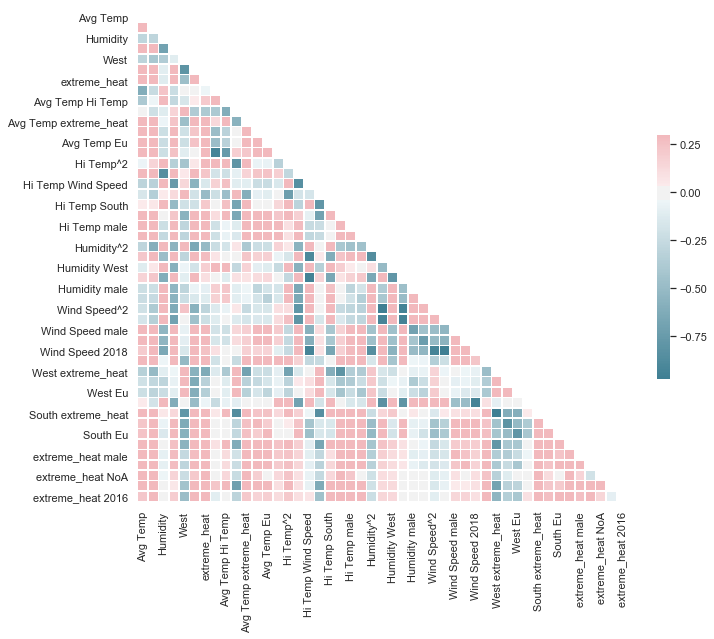

In [169]:
import seaborn as sns

sns.set(style="white")


# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [170]:
# Create correlation matrix
corr_matrix = features_selected_train.corr().abs()

In [171]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [172]:
upper

,Avg Temp,Hi Temp,Humidity,Wind Speed,West,South,extreme_heat,Avg Temp^2,Avg Temp Hi Temp,Avg Temp West,...,South^2,South extreme_heat,South male,South Eu,extreme_heat^2,extreme_heat male,extreme_heat Eu,extreme_heat NoA,extreme_heat 2015,extreme_heat 2016
Avg Temp,NaN,0.879894,0.285721,0.498333,0.300550,0.327734,0.768089,0.616237,0.391302,0.008843,...,0.041556,0.353481,0.231631,0.243340,0.668784,0.515587,0.479472,0.322118,0.437800,0.223288
Hi Temp,NaN,NaN,0.291194,0.558650,0.403001,0.514412,0.950823,0.251602,0.045135,0.211498,...,0.184153,0.538688,0.373667,0.389883,0.845098,0.630677,0.599401,0.397365,0.515356,0.400383
Humidity,NaN,NaN,NaN,0.700655,0.365579,0.100904,0.115888,0.235456,0.292323,0.123524,...,0.611215,0.054490,0.062185,0.143321,0.034874,0.081792,0.078854,0.043278,0.004771,0.004438
Wind Speed,NaN,NaN,NaN,NaN,0.112735,0.571319,0.420247,0.237125,0.271551,0.159649,...,0.609698,0.130588,0.420490,0.469423,0.262104,0.284358,0.277355,0.160299,0.053448,0.192607
West,NaN,NaN,NaN,NaN,NaN,0.806872,0.464189,0.004437,0.165065,0.585150,...,0.025138,0.788166,0.624252,0.577352,0.559270,0.263388,0.295793,0.230937,0.436172,0.478586
South,NaN,NaN,NaN,NaN,NaN,NaN,0.462519,0.013375,0.043270,0.368865,...,0.495868,0.654758,0.769724,0.748766,0.447450,0.275224,0.295018,0.217874,0.298722,0.367754
extreme_heat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039042,0.210101,0.387463,...,0.050257,0.627445,0.333951,0.343531,0.944103,0.657026,0.628364,0.426851,0.627112,0.445605
Avg Temp^2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.934111,0.389768,...,0.249864,0.053385,0.012642,0.004689,0.083923,0.035792,0.037479,0.011591,0.232191,0.101144
Avg Temp Hi Temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613555,...,0.069343,0.292004,0.031958,0.019267,0.379619,0.119235,0.114340,0.133370,0.509029,0.000910
Avg Temp West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.096678,0.863930,0.289812,0.269400,0.617923,0.197466,0.230030,0.239736,0.712719,0.299641


In [173]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [174]:
to_drop

['extreme_heat',
 'Avg Temp Hi Temp',
 'Avg Temp 2010',
 'Hi Temp West',
 'Hi Temp extreme_heat',
 'Humidity South',
 'Wind Speed^2',
 'Wind Speed South',
 'Wind Speed 2018',
 'West extreme_heat',
 'South^2',
 'South extreme_heat',
 'extreme_heat^2']

In [175]:
features_selected_train.drop(columns=to_drop, inplace=True)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [176]:
features_selected_train.shape

(696, 34)

# Another Method

In [177]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

In [191]:
k = 31
def information_selector(X, y, scoring, k=k):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [192]:
test = SelectKBest(score_func=mutual_info_regression, k=k)
fit = test.fit(features_selected_train, y_train)

In [193]:
features_selected_train[features_selected_train.columns[fit.get_support(indices=True)]].head()

,Avg Temp,Humidity,Wind Speed,West,South,Avg Temp^2,Avg Temp West,Avg Temp male,Avg Temp Eu,Hi Temp Humidity,...,West^2,West male,West Eu,South male,South Eu,extreme_heat male,extreme_heat Eu,extreme_heat NoA,extreme_heat 2015,extreme_heat 2016
0,-0.096154,-0.317674,-1.065374,0.244074,-0.172337,0.009246,-0.023469,-0.000000,-0.000000,0.094714,...,0.059572,0.000000,0.000000,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0
1,0.276164,-1.282797,1.655031,0.745229,0.401768,0.076267,0.205805,0.276164,0.276164,-0.283023,...,0.555367,0.745229,0.745229,0.401768,0.401768,1.0,1.0,0.0,0.0,0.0
2,0.701671,0.013946,0.605259,-1.503934,1.155650,0.492342,-1.055266,0.701671,0.701671,0.017547,...,2.261817,-1.503934,-1.503934,1.155650,1.155650,3.0,3.0,0.0,0.0,3.0
3,0.834851,-0.391850,0.552307,1.169125,-0.906463,0.696976,0.976045,0.834851,0.000000,-0.289736,...,1.366852,1.169125,0.000000,-0.906463,-0.000000,2.0,0.0,0.0,0.0,0.0
4,0.701671,0.013946,0.605259,-1.503934,1.155650,0.492342,-1.055266,0.000000,0.701671,0.017547,...,2.261817,-0.000000,-1.503934,0.000000,1.155650,0.0,3.0,0.0,0.0,3.0


In [194]:
features_selected_train = information_selector(features_selected_train, y_train, mutual_info_regression, k=k)

In [195]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train, y_train)


In [196]:
features_selected_test = features_many_test[features_selected_train.columns]
y_pred = lm.predict(features_selected_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# z-score
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.std())


20.318491379310345
888.1732710158042
29.802236006981158
0.717880980219115


In [184]:
features_selected_test2 = features_many_test[features_selected_train.columns]
y_pred = lm.predict(features_selected_train)

print(metrics.mean_absolute_error(y_train, y_pred))
print(metrics.mean_squared_error(y_train, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
# z-score
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred))/ y_train.std())


24.049574084051716
1121.6619265523188
33.49122163421811
0.747337438054129


# Finding R^2 and Coefficients

In [198]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()
X = features_selected_train
y = y_train

X2 = sm.add_constant(X)



# est = sm.OLS(y, X2)
# est2 = est.fit()

# print(est2.summary())

In [200]:
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train, y_train)

params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(features_selected_train)

X = features_selected_train


newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)


    Coefficients  Standard Errors      t values  Probabilites
0   3.136285e+14              NaN           NaN           NaN
1  -6.649905e+14              NaN           NaN           NaN
2   2.161797e+14              NaN           NaN           NaN
3   2.864254e+14              NaN           NaN           NaN
4   8.859863e+13     2.457452e+07  3.605305e+06         0.000
5  -8.495456e+13     1.621362e+07 -5.239704e+06         0.000
6  -3.114456e+14              NaN           NaN           NaN
7   1.805507e+14              NaN           NaN           NaN
8  -1.608670e+01     7.039000e+00 -2.285000e+00         0.023
9   2.167000e-01     7.006000e+00  3.100000e-02         0.975
10  8.690320e+13     2.960516e+07  2.935407e+06         0.000
11  6.106654e+12     2.052750e+07  2.974865e+05         0.000
12  1.686435e+14              NaN           NaN           NaN
13  7.141070e+01     7.999000e+00  8.927000e+00         0.000
14  7.898100e+00     7.922000e+00  9.970000e-01         0.319
15 -2.76

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


In [81]:
features_columns = features.columns

In [82]:
features_columns

Index(['Avg Temp', 'Hi Temp', 'Humidity', 'Wind Speed', 'West', 'South',
       'extreme_heat', 'male', 'A', 'Af', 'Au', 'Eu', 'NoA', 'SA', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'],
      dtype='object')

In [80]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [83]:
formula = "finish ~ Avg Temp+Hi Temp+Humidity+Wind Speed+West+South+extreme_heat+male+A+Af+Au+Eu+NoA+SA+2008+2009+2010+2011+2012+2013+2014+2015+2016+2017+2018'"
model = ols(formula= formula, data=data_ols).fit()

NameError: name 'data_ols' is not defined

In [ ]:
outcome = 'mpg'
predictors = data_ols.drop('mpg', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [ ]:
model = ols(formula= formula, data=data_ols).fit()
model.summary()